# Instagram Influencer -- Classification

In [1]:
from pycaret import *

In [2]:
import pandas as pd
col_val = ["Handle", "Followers", "Posts", "Avg_likes_per_post", "Avg_comments_per_post", "Engagement","Type"]
df = pd.read_csv("insta_data_label.csv", names=col_val)

In [3]:
df.head()

,Handle,Followers,Posts,Avg_likes_per_post,Avg_comments_per_post,Engagement,Type
0,garethbale11,43742183,929,484288.5587,2757.180840,0.011134,Mega
1,m10_official,24031169,1476,383372.1179,3826.567073,0.016112,Mega
2,sergioramos,43910900,2016,604594.5050,3471.809028,0.013848,Mega
3,rohitsharma45,18395566,916,453322.0611,2182.572052,0.024762,Mega
4,hardikpandya93,17889094,1212,441048.0990,1886.547855,0.024760,Mega


In [4]:
from pycaret.classification import *
cls_algo=setup(data=df,target='Type',ignore_features = ['Handle'], normalize=True, session_id=1234)

,Description,Value
0,session_id,1234
1,Target,Type
2,Target Type,Multiclass
3,Label Encoded,"Macro: 0, Mega: 1, Micro: 2, Mid-tier: 3"
4,Original Data,"(60, 7)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [5]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9250,0.9000,0.9125,0.9250,0.9167,0.9000,0.9191,0.1600
gbc,Gradient Boosting Classifier,0.9000,0.8750,0.8875,0.8875,0.8833,0.8667,0.8921,0.1910
et,Extra Trees Classifier,0.9000,0.9000,0.8875,0.8875,0.8833,0.8667,0.8921,0.1740
nb,Naive Bayes,0.8500,0.8792,0.8375,0.8125,0.8167,0.8000,0.8382,0.0100
dt,Decision Tree Classifier,0.8000,0.8167,0.8000,0.7375,0.7583,0.7333,0.7651,0.0180
qda,Quadratic Discriminant Analysis,0.7750,0.8417,0.7625,0.6958,0.7208,0.6939,0.7423,0.0220
ada,Ada Boost Classifier,0.7550,0.8217,0.7375,0.6750,0.6928,0.6706,0.7339,0.0530
knn,K Neighbors Classifier,0.6350,0.7825,0.6458,0.5667,0.5817,0.5049,0.5484,0.0170
svm,SVM - Linear Kernel,0.6300,0.0000,0.6375,0.5317,0.5550,0.5147,0.5837,0.0140
lr,Logistic Regression,0.6100,0.7800,0.6083,0.4817,0.5217,0.4617,0.5359,0.5090


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1234, verbose=0,
                       warm_start=False)

In [6]:
model_rf= create_model('rf') 

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.7500,1.0000,0.7500,0.6250,0.6667,0.6667,0.7303
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.7500,1.0000,0.7500,0.6250,0.6667,0.6667,0.7303
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,0.7500,0.0000,0.6250,1.0000,0.8333,0.6667,0.7303


In [7]:
tuned_model_rf = tune_model(model_rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.7500,1.0000,0.7500,0.6250,0.6667,0.6667,0.7303
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.7500,1.0000,0.7500,0.6250,0.6667,0.6667,0.7303
9,0.7500,0.0000,0.6250,1.0000,0.8333,0.6667,0.7303


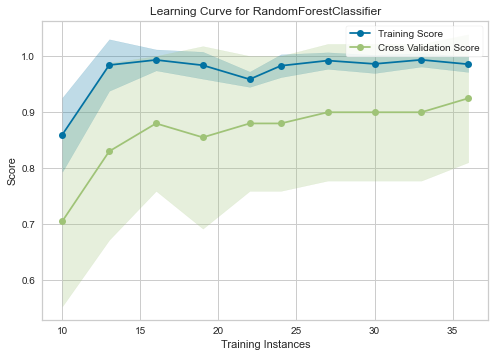

In [8]:
plot_model(estimator = tuned_model_rf, plot = 'learning')

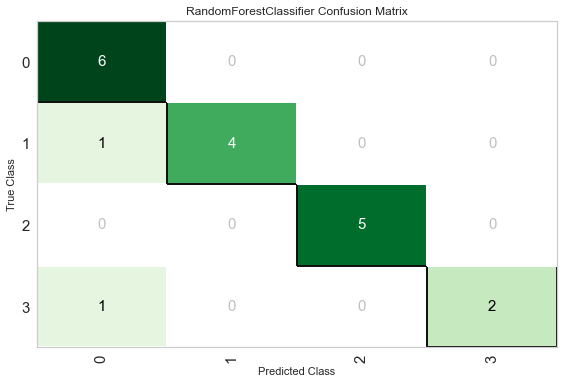

In [9]:
plot_model(estimator = tuned_model_rf, plot = 'confusion_matrix')

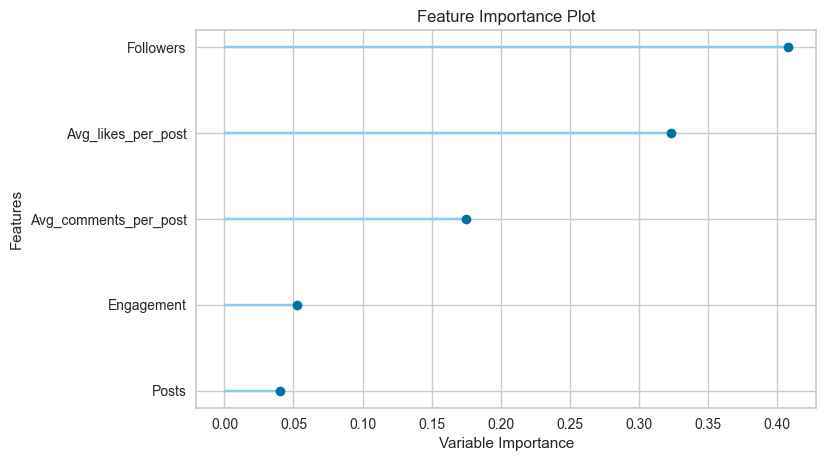

In [10]:
plot_model(estimator = tuned_model_rf, plot = 'feature')

In [11]:
predictions = predict_model(tuned_model_rf, data=df)
predictions.head()

,Handle,Followers,Posts,Avg_likes_per_post,Avg_comments_per_post,Engagement,Type,Label,Score
0,garethbale11,43742183,929,484288.5587,2757.180840,0.011134,Mega,Mega,0.9201
1,m10_official,24031169,1476,383372.1179,3826.567073,0.016112,Mega,Mega,0.9798
2,sergioramos,43910900,2016,604594.5050,3471.809028,0.013848,Mega,Mega,0.9879
3,rohitsharma45,18395566,916,453322.0611,2182.572052,0.024762,Mega,Mega,0.9144
4,hardikpandya93,17889094,1212,441048.0990,1886.547855,0.024760,Mega,Mega,0.9244


In [12]:
tuned_model_rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=4, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.01, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=120,
                       n_jobs=-1, oob_score=False, random_state=1234, verbose=0,
                       warm_start=False)

In [13]:
 save_model(tuned_model_rf, 'Influencer_prediction_rf')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True,
                                       features_todrop=['Handle'], id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Type',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight='balanced',
                                         criterion='entropy', max_depth=4,
                                         max_features='sqrt',